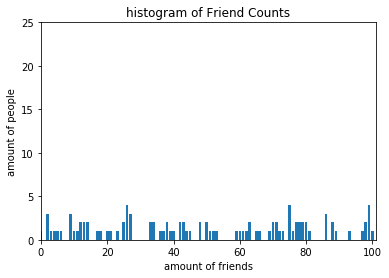

In [70]:
####宣告一組數值
import random
num_friends=[]
for i in range(0,100):
    a=random.randint(0,100)
    num_friends.append(a)
num_friends
######################################################
import random
daily_minutes=[]
for i in range(0,100):
    a=random.randint(0,100)
    daily_minutes.append(a)
daily_minutes
######################################################
from collections import Counter
import matplotlib.pyplot as plt
friend_counts=Counter(num_friends)
xs = range(101)                   #最大數字為100
ys = [friend_counts[x] for x in xs] #高度為朋友的數量
plt.bar(xs,ys)
plt.axis([0, 101, 0, 25])
plt.title("histogram of Friend Counts")
plt.xlabel("amount of friends")
plt.ylabel("amount of people")
plt.show()

#########################################################

num_points = len(num_friends)
largest_value = max(num_friends)
smallest_value = min(num_friends)
sorted_values = sorted(num_friends)
smallest_valu = sorted_values[0]
second_smallest_value = sorted_values[1] #1
second_largest_value = sorted_values[-2] #49

In [50]:
def median(v):
    '''找出落在v最中央位置的數值'''
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n%2 == 1:
        #如果是奇數送回中位數
        return sorted_v[midpoint]
    else:
        #如果是偶數,就送回兩個中央位置的平均值
        lo = midpoint-1
        hi = midpoint
        return (sorted_v[lo]+sorted_v[hi]) / 2
median(num_friends)

53.0

In [51]:
def quantile(x,p):
    '''送回x裡頭正好位於第p個百分比位置的數值'''
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print(quantile(num_friends,0.25))
print(quantile(num_friends,0.99))
print(quantile(num_friends,0.9))

25
100
94


In [52]:
# from collections import Counter
#######眾數
def mode(x):
    '''送回一個列表,裡頭放的是眾數(數量不只一個)'''
    counts=Counter(x)
    max_count=max(counts.values())#找出最多的數值
    return[x_i for x_i,count in counts.items()
           if count == max_count]
mode(num_friends)

[20]

In [53]:
##離散程度
#range 再python 中有其他的意義 所以我們使用另一個不同的名稱
def data_range(x):
    return max(x)-min(x)
data_range(num_friends)

100

In [59]:
from numpy import mean
#向量內積
def dot(v , w):
    """v_1 * w_1 +...+v_n * w_n """
    return sum(v_i * w_i
               for v_i,w_i in zip(v,w))

###################################################

def sum_of_squares(v):
    '''v_1 * v_1 +...+v_n * v_n'''
    return dot(v,v)

#變異數
def de_mean(x):
    """把x轉換成每個元素與平均值的差值"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    '''假設x至少有兩個元素'''
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)
variance(num_friends)

883.86828282828299

In [62]:
import math
def standard_deviation(x):
    return math.sqrt(variance(x))
standard_deviation(num_friends)

29.729922348171094

In [65]:
def interquartile_range(x):
    return quantile(x,0.75) - quantile(x,0.25)
interquartile_range(num_friends)

54

In [67]:
###############################相關
def covariance(x,y):
    n=len(x)
    return dot(de_mean(x),de_mean(y)) / (n-1)
covariance(num_friends,daily_minutes)

51.577878787878788

In [71]:
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x /stdev_y
    else:
        return 0 #如果沒有變異數 相關值是零
correlation(num_friends,daily_minutes)

0.13560813252874671

In [72]:
outlier = num_friends.index(100)
num_friends_good =[ x
                   for i , x in enumerate(num_friends)
                   if i != outlier]
daily_minutes_good = [ x
                      for i ,x in enumerate(daily_minutes)
                      if i != outlier]
correlation(num_friends_good,daily_minutes_good)

0.14592127217269954